In [1]:
# Setup
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

import sccoda.datasets as scd

In [2]:
# Load data

cell_counts = pd.read_csv('epithelial_cells_counts_v3.csv')
cell_counts

,sample,age,sex,batch,status,EEC,EEC A/M,EEC D,EEC I/L,EEC K,...,Enterocytes mature (zone 4),Enterocytes mature (zone 5),Goblet cells,Paneth cells,Stem cells 1,Stem cells 2,TA cells 1,TA cells 2,Tuft cells,BEST4 cells
0,CeD1,10,M,A,CeD,4,4,21,9,8,...,12,1,11,42,175,31,61,67,28,0
1,CeD2,14,F,A,CeD,0,8,22,8,9,...,22,25,13,5,164,67,48,39,54,7
2,CeD2,14,F,F,CeD,1,2,4,2,3,...,4,18,9,0,163,30,58,24,7,3
3,CeD3,14,F,A,CeD,1,25,3,14,3,...,42,95,21,7,212,130,73,56,67,27
4,CeD4,17,F,A,CeD,0,4,2,2,0,...,1,1,19,35,74,34,48,20,9,0
5,CeD4,17,F,F,CeD,2,5,3,5,4,...,1,0,20,7,31,13,41,14,9,1
6,Ctrl1,15,F,A,Ctrl,20,15,10,11,30,...,227,126,26,51,105,105,29,17,96,16
7,Ctrl1,15,F,F,Ctrl,20,17,12,10,4,...,144,38,25,19,177,81,39,31,55,10
8,Ctrl2,11,M,F,Ctrl,14,10,17,10,11,...,103,270,15,12,149,175,91,35,64,9
9,Ctrl4,12,M,A,Ctrl,0,4,2,14,0,...,75,291,30,8,96,99,20,13,42,24


In [3]:
# Convert data to anndata object
data_all = dat.from_pandas(cell_counts, covariate_columns = ['sample', 'age', 'sex', 'batch', 'status'])
print(data_all.obs)

   sample  age sex batch status
0    CeD1   10   M     A    CeD
1    CeD2   14   F     A    CeD
2    CeD2   14   F     F    CeD
3    CeD3   14   F     A    CeD
4    CeD4   17   F     A    CeD
5    CeD4   17   F     F    CeD
6   Ctrl1   15   F     A   Ctrl
7   Ctrl1   15   F     F   Ctrl
8   Ctrl2   11   M     F   Ctrl
9   Ctrl4   12   M     A   Ctrl
10  Ctrl5   15   F     A   Ctrl


<AxesSubplot:xlabel='Cell type', ylabel='Proportion'>

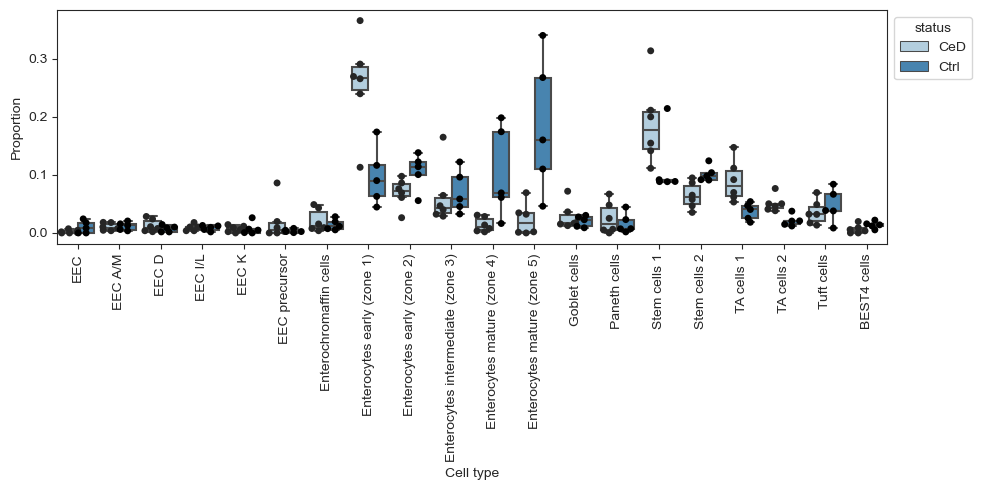

In [4]:
viz.boxplots(data_all, feature_name = 'status', figsize = (10,5), add_dots = True)

In [5]:
# Model
model = mod.CompositionalAnalysis(data_all, formula = "~C(status, Treatment('Ctrl')) + age + sex + batch", reference_cell_type = "automatic")
results = model.sample_hmc(num_results = 200000, num_burnin = 10000)
results.summary()
pd.DataFrame.to_csv(results.effect_df, 'scCODA_epithelia_effects_summary.csv')

Automatic reference selection! Reference cell type set to EEC I/L
Zero counts encountered in data! Added a pseudocount of 0.5.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


100%|█████████████████████████████████████████████████████████████████████████| 200000/200000 [29:47<00:00, 111.87it/s]


MCMC sampling finished. (1941.127 sec)
Acceptance rate: 22.1%
Compositional Analysis summary:

Data: 11 samples, 20 cell types
Reference index: 3
Formula: ~C(status, Treatment('Ctrl')) + age + sex + batch

Intercepts:
                                   Final Parameter  Expected Sample
Cell Type                                                          
EEC                                         -0.862         6.646767
EEC A/M                                     -0.030        15.273672
EEC D                                       -0.205        12.821591
EEC I/L                                     -0.193        12.976377
EEC K                                       -0.180        13.146171
EEC precursor                               -0.682         7.957625
Enterochromaffin cells                       0.316        21.587848
Enterocytes early (zone 1)                   1.649        81.869830
Enterocytes early (zone 2)                   1.641        81.217485
Enterocytes intermediate (zone 3) 